# Telco Customer Churn 
 By Nadya Sindi Safitri


## Business Problem Understanding

**Context**  
Sebuah perusahaan yang bergerak di bidang Telekomunikasi ingin menarik lebih banyak pelanggan baru dan menghindari pemutusan kontrak dari pelanggan yang ada (Customer Churn). Perusahaan tersebut ingin memprediksi apakah seorang customer akan churn, sehingga mereka dapat mengurangi hal tersebut dengan memberikan treatment yang sesuai kepada Pelanggan yang ada.

Target :

0 : Customer tidak Churn 

1 : Customer Churn

**Problem Statement :**

Faktor yang menyebabkan Customer Churn yaitu penawaran harga yang lebih baik, layanan internet yang lebih cepat dari perusahaan lain dan pengalaman layanan yang buruk atau perubahan situasi pribadi pelanggan. Perusahaan ingin mengetahui pelanggan mana yang ingin Churn atau tidak untuk mengetahui seberapa baik perusahaan mempertahankan pelanggan yang ada dan memahami apa alasan yang menyebabkan pelanggan mengakhiri kontrak mereka (tingkat churn yang tinggi). Perusahaan lebih memutuskan mempertahankan pelanggan, karena dibutuhkan biaya lebih sedikit daripada mencari pelanggan baru.


**Goals :**

Berdasarkan permasalahan tersebut, perusahaan ingin memprediksi pelanggan yang akan melakukan Churn akan memudahkan perusahaan memberikan treatment kepada pelanggan seperti memberikan diskon, penawaran khusus, dan produk unggulan untuk menjaga pelanggan saat ini.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang pelanggan mau Churn atau tidak, sehingga perusahaan dapat membuat rencana yang lebih baik dalam menarik lebih banyak pelanggan baru.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang churn atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas pelanggan akan/ingin memutuskan kontrak dengan perusahaan atau tidak.

<br>**References :**
- https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2
- https://rpubs.com/tomytjandra/telco-customer-churn
- https://www.wificolony.com/single-post/2019/02/01/5-cara-mengurangi-tingkat-churning-pelanggan


**Metric Evaluation**


*Type 1 error : False Positive*
<br>Konsekuensi: membuang biaya dari treatment yang diberikan

*Type 2 error : False Negative*
<br>Konsekuensi: Kehilangan pelanggan 

Berdasarkan konsekuensinya, maka kita akan membuat model yang dapat meminimalisir 2 hal:
1. Jumlah Treatment yang diberikan kepada pelanggan sehingga harga yang keluar lebih efisien.
2. Jumlah pelanggan yang dianggap akan bertahan tetapi justru Churn, sehingga perusahaan akan kehilangan pelanggan dan menjadi rugi.



## Data Understanding

Note : 
- Dataset tidak seimbang
- Sebagian besar feature bersifat kategori 

Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Attribute Information
 - Dependents: Apakah pelanggan memiliki tanggungan atau tidak (Yes, No)
 - Tenure: Jumlah bulan dalam menggunakan produk perusahaan
 - OnlineSecurity: Apakah pelanggan memiliki keamanan online atau tidak
 - OnlineBackup: Apakah pelanggan memiliki cadangan online atau tidak
 - InternetService: Penyedia layanan internet pelanggan (DSL, Fiber optic, No)
- DeviceProtection: Apakah pelanggan memiliki perlindungan perangkat atau tidak
- TechSupport: Apakah pelanggan memiliki dukungan teknis atau tidak
- Contract: Ketentuan kontrak berlangganan (Month-to-month, One year, Two year)
- PaperlessBilling: Apakah pelanggan memiliki tagihan tanpa kertas atau tidak (Yes, No)
- MonthlyCharges: Jumlah pembayaran yang dilakukan setiap bulan
- Churn: Apakah pelanggan Churn atau tidak (Yes or No)

In [1853]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler,MinMaxScaler
# Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [1854]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


## EDA


In [1855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


ternyata setelah di cek tidak ada missing value 

In [1856]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [1857]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in Dependents:  2
Unique values:  ['Yes' 'No']

Total unique values in OnlineSecurity:  3
Unique values:  ['No' 'Yes' 'No internet service']

Total unique values in OnlineBackup:  3
Unique values:  ['No' 'Yes' 'No internet service']

Total unique values in InternetService:  3
Unique values:  ['DSL' 'Fiber optic' 'No']

Total unique values in DeviceProtection:  3
Unique values:  ['Yes' 'No internet service' 'No']

Total unique values in TechSupport:  3
Unique values:  ['Yes' 'No' 'No internet service']

Total unique values in Contract:  3
Unique values:  ['Month-to-month' 'Two year' 'One year']

Total unique values in PaperlessBilling:  2
Unique values:  ['Yes' 'No']

Total unique values in Churn:  2
Unique values:  ['Yes' 'No']



In [1858]:
df['Churn'].value_counts() / len(df)*100

No     73.306288
Yes    26.693712
Name: Churn, dtype: float64

karena datanya imbalace kita menggunakan f1 score dibandingkan acuracy.

In [1859]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Rata-rata, orang yang membayar layanan $ 64,88 dan biaya paling mahal setiap bulan adalah $118,65. Biaya bulanan termurah adalah $$18,25.

In [1860]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

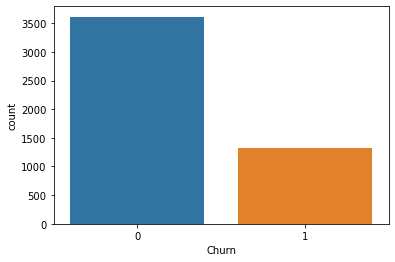

In [1861]:
sns.countplot(x='Churn', data=df);
plt.show()

Plot ini menunjukkan ketidakseimbangan kelas data antara churn dan non-churn. Untuk mengatasi hal ini, resampling akan menjadi pendekatan yang cocok.

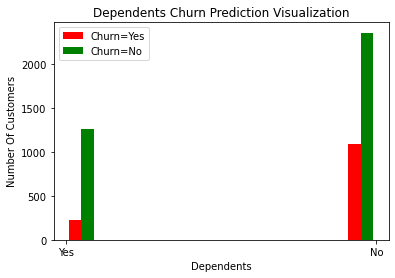

In [1862]:
# Perbandingan churn customers pada tiap negara
churn_no = df[df.Churn==0]['Dependents']
churn_yes = df[df.Churn==1]['Dependents']

plt.xlabel('Dependents')
plt.ylabel('Number Of Customers')
plt.title('Dependents Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

Pada plot diatas terlihat pelanggan yang tidak memiliki Tanggungan akan lebih cenderung memutuskan layanan Telekomunikasi.

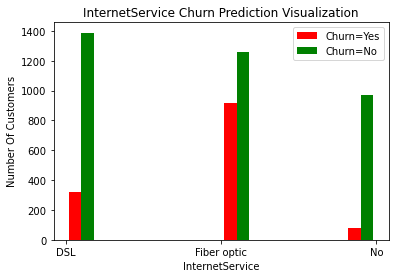

In [1863]:
# Perbandingan churn customers pada tiap negara
churn_no = df[df.Churn==0]['InternetService']
churn_yes = df[df.Churn==1]['InternetService']

plt.xlabel('InternetService')
plt.ylabel('Number Of Customers')
plt.title('InternetService Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

In [1864]:
df.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
0      DSL                1388
       Fiber optic        1256
       No                  970
1      Fiber optic         916
       DSL                 318
       No                   82
Name: InternetService, dtype: int64

Internet Service, terlihat di table atas kebanyakan orang menggunakan internet Fiber dan pelanggan yang berlangganan internet Fiber lebih cenderung churn.

## **Layanan Internet Pelanggan** 

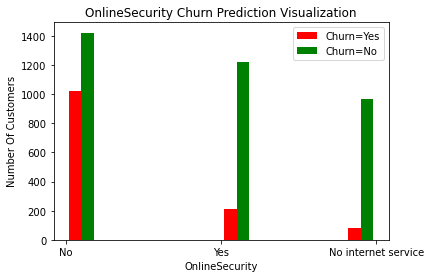

In [1865]:

churn_no = df[df.Churn==0]['OnlineSecurity']
churn_yes = df[df.Churn==1]['OnlineSecurity']

plt.xlabel('OnlineSecurity')
plt.ylabel('Number Of Customers')
plt.title('OnlineSecurity Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

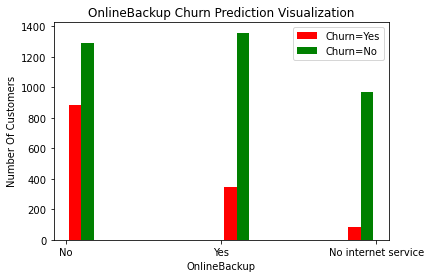

In [1866]:
churn_no = df[df.Churn==0]['OnlineBackup']
churn_yes = df[df.Churn==1]['OnlineBackup']

plt.xlabel('OnlineBackup')
plt.ylabel('Number Of Customers')
plt.title('OnlineBackup Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

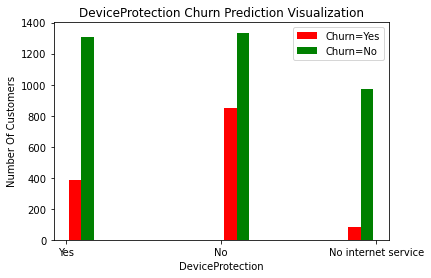

In [1867]:
churn_no = df[df.Churn==0]['DeviceProtection']
churn_yes = df[df.Churn==1]['DeviceProtection']

plt.xlabel('DeviceProtection')
plt.ylabel('Number Of Customers')
plt.title('DeviceProtection Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

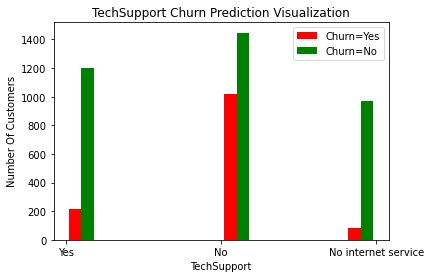

In [1868]:
churn_no = df[df.Churn==0]['TechSupport']
churn_yes = df[df.Churn==1]['TechSupport']

plt.xlabel('TechSupport')
plt.ylabel('Number Of Customers')
plt.title('TechSupport Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

Terlihat pada layanan internet cukup meningkatkan pelanggan tidak churn dan tidak berlangganan feature OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport lebih banyak yang churn.

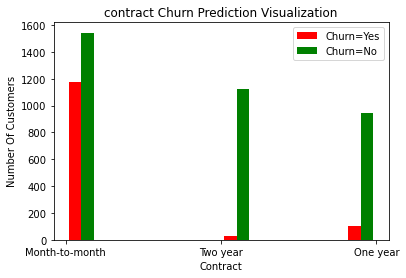

In [1869]:
churn_no = df[df.Churn==0]['Contract']
churn_yes = df[df.Churn==1]['Contract']

plt.xlabel('Contract')
plt.ylabel('Number Of Customers')
plt.title('contract Churn Prediction Visualization')
plt.hist([churn_yes, churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend();

Pada Feature Contract terlihat Pelanggan dengan kontrak bulanan memiliki tingkat churn lebih tinggi dibandingkan dengan yang mengikuti kontrak tahunan.

Text(0.5, 1.0, 'Density Distribution of Total Bill')

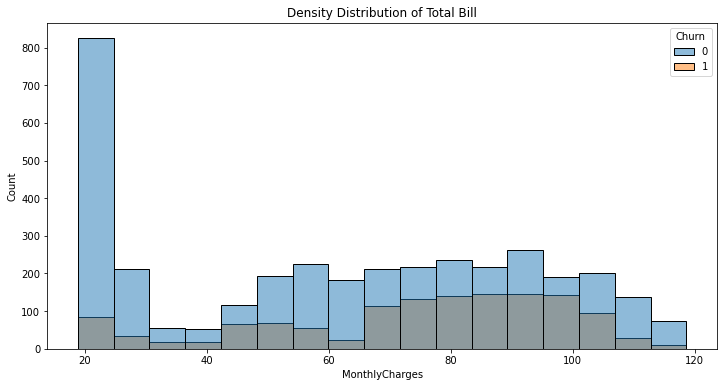

In [1870]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='MonthlyCharges', hue='Churn')

plt.title('Density Distribution of Total Bill')

Terlihat pada tabel diatas, tingkat churn cenderung lebih besar ketika biaya bulanan tinggi.

## **Data Splitting**

In [1871]:

X = df.drop(['Churn'], axis=1)
y = df['Churn']

pertama kita define X dan Y, dari EDA sebelumnya didapatkan bahwa Churn sebagai target (Y) dan sisanya adalah Feature(X).  

In [1872]:

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

lalu kita splitting, karena targetnya kategorikal maka kita memakai stratify=yuntuk menyamakan proporsi kelas 0 dan kelas 1 pada train set dan test set. test_size menentukan jumlah data/baris yg digunakan sebagai test set. random_state agar randomize konsisten

## **Pre-processing and Data Transform**

In [1873]:
# Transformer scheme
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Dependents', 'OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport',
    'Contract','PaperlessBilling'])
], remainder='passthrough')
transformer
# Scaler
scaler = StandardScaler()

kemudian prepocessing ada encoding saya disini menggunakan onehotEncoder semua untuk kolom kategorikal karena kategorinya paling banyak 3. 

In [1874]:
# Define models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)


## **Tanpa Balancing**

In [1875]:


models = [knn, tree, logreg,rf, gbc]

score = []
nilai_mean = []
nilai_std = []

for i in models:

    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    model_pipe = Pipeline([
        ('transform', transformer),
        ('scale', scaler),
        ('model', i)
    ])

    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='f1', 
        error_score='raise'
        )

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

    print(model_cv, i)

[0.52150538 0.49468085 0.50753769 0.52068127 0.46753247] KNeighborsClassifier()
[0.51690821 0.47085202 0.51508121 0.51467269 0.51627907] DecisionTreeClassifier(random_state=0)
[0.59585492 0.59895833 0.5914787  0.56476684 0.56396867] LogisticRegression(random_state=0)
[0.54787234 0.49456522 0.52442159 0.515      0.5255102 ] RandomForestClassifier(random_state=0)
[0.59042553 0.5613079  0.59183673 0.54881266 0.55434783] GradientBoostingClassifier(random_state=0)


In [1876]:
pd.DataFrame({
    'model':[knn, tree, logreg,rf, gbc],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,KNeighborsClassifier(),0.502388,0.020005
1,DecisionTreeClassifier(random_state=0),0.506759,0.017971
2,LogisticRegression(random_state=0),0.583005,0.015404
3,RandomForestClassifier(random_state=0),0.521474,0.017250
4,GradientBoostingClassifier(random_state=0),0.569346,0.018228


disini saya mencoba tidak treatment imbalance dahulu. Pertama saya cross validasi mencari algoritma terbaik tanpa menggunakan treatment imbalance. saya disini mencari model yang terbaik diantaranya ada model KNN, Decision Tree, LogisticRegression, RandomForest, dan gradient Boosting. Menggunakan stratifiedKfold untuk splitting. lalu hasilnya yang paling tinggi rata-rata 0.58 olej model logisticRegresion.

## Test Oversampling(Balancing)

In [1877]:

models = [knn, tree, logreg,rf, gbc]

score = []
nilai_mean = []
nilai_std = []

for i in models:

    smote = SMOTE(random_state=0)
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    model_pipe = Pipeline([
        ('transform', transformer),
        ('scale', scaler),
        ('balancing', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='f1', 
        error_score='raise'
        )

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

    print(model_cv, i)

[0.58299595 0.54043393 0.58574181 0.54863813 0.57480315] KNeighborsClassifier()
[0.56703297 0.5115304  0.52928416 0.5408805  0.54077253] DecisionTreeClassifier(random_state=0)
[0.62357414 0.61393597 0.64102564 0.62942272 0.61818182] LogisticRegression(random_state=0)
[0.56206089 0.54587156 0.56621005 0.53947368 0.57142857] RandomForestClassifier(random_state=0)
[0.6        0.63261297 0.63547758 0.63238095 0.60990099] GradientBoostingClassifier(random_state=0)


In [1878]:
pd.DataFrame({
    'model':[knn, tree, logreg,rf, gbc],
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,KNeighborsClassifier(),0.566523,0.018492
1,DecisionTreeClassifier(random_state=0),0.537900,0.018086
2,LogisticRegression(random_state=0),0.625228,0.009456
3,RandomForestClassifier(random_state=0),0.557009,0.012244
4,GradientBoostingClassifier(random_state=0),0.622074,0.014369


Selanjutnya disini pertama menggunakan cross validasi menggunakan treatment imbalance yaitu menggunakan Smote. Menggunakan F1 score karena datanya imbalance tidak mungkin menggunakan accuracy. Sehingga disini memperoleh hasilnya meningkat paling bagus model logistic regresion yang paling tinggi nilai rata-ratanya dan paling kecil nilai standar deviasinya

## **Tuning the benchmark model**

In [1879]:

smote = SMOTE(random_state=0)
model = LogisticRegression()

model_pipe = Pipeline([
    ('transform', transformer),
    ('scale', scaler),
    ('balancing', smote),
    ('model', model)
])


hyperparam_space = {
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['liblinear','newton-cg','saga']
}


skf = StratifiedKFold(n_splits = 5)


grid_search = GridSearchCV(
    model_pipe,
    param_grid = hyperparam_space, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                  

In [1880]:
print('Best score:', grid_search.best_score_)
print('Best params:', grid_search.best_params_)

Best score: 0.6283354290417444
Best params: {'model__C': 0.01, 'model__solver': 'newton-cg'}


Berikutnya disini di tunning menggunakan model logisticregresion. Setelah diTunning bisa menaikan sedikit score. menggunakan standarScaler lalu mencoba ganti scalernya tetapi tidak meningkat untuk model logistik regresion karena scaler berpengaruh terhadap model knn, decision tree dan lainnya. Menggunakan GridSearchCV untuk semuanya dicari menjadi bisa maksimal. 
Terlihat bahwa setelah di tunning Hasil best score bisa 0.628 dan kita mendapatkan best parameter logisticregresion.

## **Model Prediction in Test Set**

In [1881]:
smote = SMOTE(random_state=0)
model =  LogisticRegression()

estimator = Pipeline([
    ('transform', transformer),
    ('scale', scaler),
    ('balancing', smote),
    ('model', model)
])

estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)

f1_before= f1_score(y_test,y_pred)
f1_before

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       723
           1       0.51      0.79      0.62       263

    accuracy                           0.74       986
   macro avg       0.71      0.76      0.71       986
weighted avg       0.80      0.74      0.76       986



In [1882]:
model_final = grid_search.best_estimator_

model_final.fit(X_train, y_train)
#predict
y_pred_tuning = model_final.predict(X_test)
#metric evaluation
f1_best= f1_score(y_test,y_pred_tuning)
f1_best


0.6199701937406855

In [1883]:
print(classification_report(y_test, y_pred_tuning))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       723
           1       0.51      0.79      0.62       263

    accuracy                           0.74       986
   macro avg       0.71      0.76      0.71       986
weighted avg       0.80      0.74      0.75       986



Comparison of before and after tuning

In [1884]:
pd.DataFrame({
    'metrics':['Before tuning','After tuning'],
    'f1':[f1_before,f1_best]

})

,metrics,f1
0,Before tuning,0.622024
1,After tuning,0.619970


Terlihat bahwa model Logisticregresion sebelum kita tuning hyperparameternya memiliki nilai F1-Score yang lebih kecil sedikit pada test set, meskipun nilai nya lebih tinggi pada training set.

## Conclusion & Recommendation

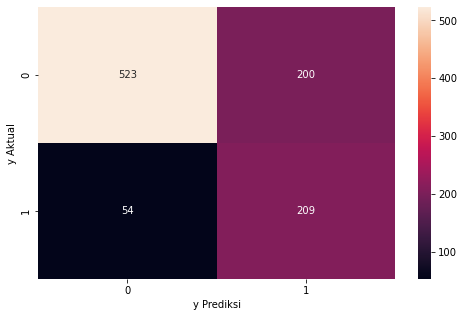

In [1885]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

### Conclusion

Hal-hal yang dapat dikonklusikan berdasarkan hasil classification report:
- Berdasarkan tabel diatas terdapat 200 pelanggan yang tidak menerima treatment padahal memang tidak akan churn dan terdapat 54 menerima treatment dan memang akan churn.
- Kita dapat memprediksi 523 customer yang tidak churn dengan tepat, dan memprediksi 209 customer yang churn dengan tepat.
- Tidak terdapat perbedaan signifikan antara hasil sebelum dan sesudah tuning. Karena jumlah sample kelas negatif jauh lebih banyak dari kelas positif, dari confusion matrix plot dapat dilihat bahwa banyak terdapat samples kelas negatif yang bisa menjadi false positive. Sebaliknya, karena sample kelas positif hanya berjumlah sedikit, maka sedikit pula samples kelas positif yang menjadi false negatif. 

#### Recommendation

Hal-hal yang bisa dilakukan untuk mempertahankan pelanggan:
- meningkatkan treatment di akhir bulan agar pelanggan melanjutkan kontraknya.
- semakin lama durasi kontrak, semakin kecil kemungkinan pelanggan akan churn sehingga lebih perbanyak paketan untuk kontrak yang tahunan.
- layanan/treatment sangat berpengaruh untuk pelanggan.
- pelanggan lebih tertarik menggunakan layanan internet, dapat memberikan promo yang menarik pada layanan internet.

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Menambah beberapa data/feature lainnya sehingga performa model dapat lebih ditingkatkan.
- Mencoba model Machine Learning lainnya, ataupun handling imbalance dengan metode lain dan kemudian di hyperparameter tuning dengan lebih baik.
- pengecekan lebih detail.